# Shift and Stack Visualization  
  
This notebook demonstrates the basic concepts behind a shift and stack algorithm. It loads image data from files, shifts them according to a given velocity, and displays the stacked image.

## Setup for shift and stack
Before importing, make sure you have installed kbmod using `pip install .` in the root directory.  Also be sure you are running with python3 and using the correct notebook kernel.

In [1]:
# everything we will need for this demo
import kbmod.search as kb
import matplotlib.pyplot as plt
import math
import os

## Loading data for shift and stack

We load the data as a stack of images from a directory. You can use any data you like, but replacing the line that computes `files` in the code below:

In [2]:
p = kb.psf(1.0)

im_path = "../data/small/"
files = [im_path + f for f in os.listdir(im_path) if ".fits" in f]
files.sort()

# Create default PSFs for each image.
all_psfs = [p for _ in range(len(files))]

# Load the images.
stack = kb.image_stack(files, all_psfs)

num_images = stack.img_count()
print(f"Loaded {num_images} images.")

.Loaded 10 images.
.........

We display each image individually:

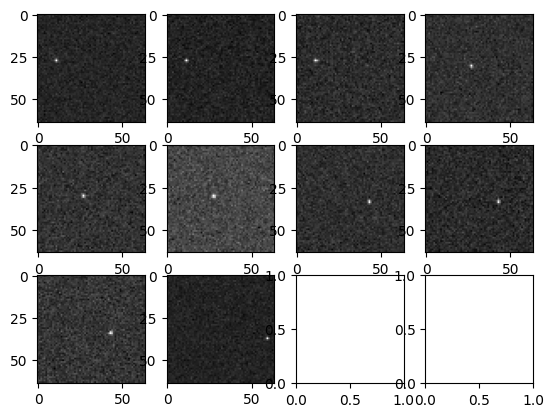

In [3]:
w = 4
h = math.ceil(num_images / w)

fig, axs = plt.subplots(h, w)
for i in range(h):
    for j in range(w):
        ind = w * i + j
        if ind < num_images:
            axs[i, j].imshow(stack.get_single_image(ind).get_science(), cmap="gray")

# Shift and Stack

The most basic form of shift and stack takes two parameters: pixel space velocities along the x and y dimensions. The demo data in "../data/small" has a fake object with x_v = 16.0 and y_v = 3.3, but you can try any value you want.

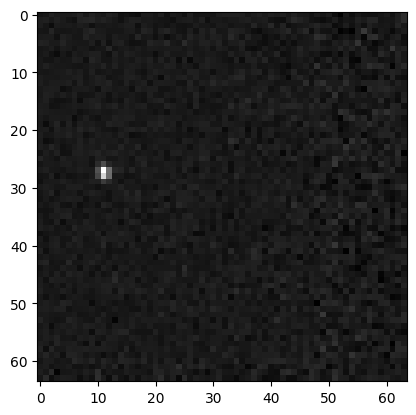

In [4]:
x_v = 16.0
y_v = 3.3
combined = stack.simple_shift_and_stack(x_v, y_v, True)
plt.imshow(combined, cmap="gray")